In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect #also added inspect so I can find table names later

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model... getting the system structure and applying it to my data
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table   #this is a class equal to the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Using Inspector to print the table names I'm going to need to reference later
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
m_columns = inspector.get_columns('measurement')
for c in m_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
s_columns = inspector.get_columns('station')
for c in s_columns:
    print(c['name'], c["type"])   

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# exploring my data - measurement
data = engine.execute("SELECT * FROM measurement LIMIT 10")
for record in data:
    print(record)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [14]:
# exploring my data - stations
data = engine.execute("SELECT * FROM station LIMIT 10")
for record in data:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [16]:
# Calculate the date 1 year ago from the last data point in the database

# Latest date 2017-8-23  - used DB Browser to find
# session.query(Measurement.date).all()

latest_date = dt.date(2017, 8, 23) 
delta = latest_date - dt.timedelta(days=365)
delta

datetime.date(2016, 8, 23)

In [17]:
# Perform a query to retrieve the data and precipitation scores

one_yr_prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= delta).all()

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date


#loop through and add date and prcp to 2 different lists to create a dataframe
count = 0
one_yr_date = []
one_yr_prcp = []

for row in one_yr_prcp_data:
    count = count + 1
    one_yr_date.append(row.date)
    one_yr_prcp.append(row.prcp)

# print(str(len(one_yr_date)), ",", str(len(one_yr_prcp)), ",", count)  # just double checking everything worked
    
one_yr_dict = {"date": one_yr_date, "precipitation": one_yr_prcp}  # creating a dictionary with the 2 lists
prcp_df = pd.DataFrame(one_yr_dict)


prcp_df.set_index(prcp_df['date'], inplace=True) #setting the index to the date
prcp_df = prcp_df.sort_values("date")  #sorting by the date
prcp_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15


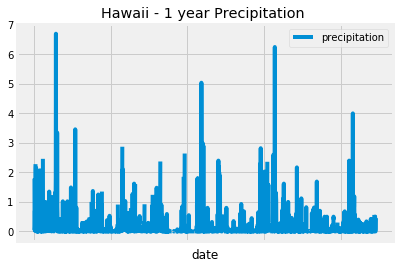

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(x="date",y="precipitation",kind="line",ax=None,legend=True,
                     title="Hawaii - 1 year Precipitation ")

![precipitation](Images/precipitation.png)

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [21]:
# Design a query to show how many stations are available in this dataset?
station_data = session.query(Station.station).distinct().all()
    
station_count = session.query(Station.station).distinct().count()
station_count

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
from sqlalchemy import desc

# List the stations and the counts in descending order.
station_counts_desc = session.query(Measurement.station,func.count(Measurement.station).label("scount")).\
                    group_by(Measurement.station).\
                    order_by(desc("scount")).\
                    all()
station_counts_desc

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
#Station with the most records(most active)
(station_max , count_max) = station_counts_desc[0]
print(station_max,count_max)

USC00519281 2772


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature for the most active station?

station_temp_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                     filter(Measurement.station == station_max).\
                     all()
station_temp_stats

[(54.0, 85.0, 71.66378066378067)]

In [25]:
# Choose the station with the highest number of temperature observations.

# Query to retrive a count of only the tobs (temperature observations)
station_tobs_counts = session.query(Measurement.station,func.count(Measurement.tobs).label("count_tobs")).\
                     filter(Measurement.date > delta).\
                     group_by(Measurement.station).\
                     order_by(desc("count_tobs")).\
                     all()

(tobs_station_max , tobs_count_max) = station_tobs_counts[0] #because it is in desc order the station at index 0 has the most tobs
print(tobs_station_max,tobs_count_max)

USC00519397 360


In [26]:
# Query the last 12 months of temperature observation data for this station... 

station_temps = session.query(Measurement.tobs).\
                     filter(Measurement.date > delta).\
                     filter(Measurement.station ==  tobs_station_max).\
                     all()

tobs_list = []
count = 0

for row in station_temps:
    count = count + 1
    tobs_list.append(row)

print(count)
tobs_list = [float(str(i)[1:-2]) for i in tobs_list]
tobs_list

360


[79.0,
 80.0,
 79.0,
 77.0,
 78.0,
 78.0,
 79.0,
 80.0,
 81.0,
 80.0,
 79.0,
 75.0,
 79.0,
 76.0,
 76.0,
 80.0,
 79.0,
 78.0,
 76.0,
 78.0,
 78.0,
 75.0,
 79.0,
 80.0,
 79.0,
 81.0,
 77.0,
 77.0,
 78.0,
 76.0,
 82.0,
 81.0,
 78.0,
 80.0,
 80.0,
 79.0,
 80.0,
 80.0,
 80.0,
 79.0,
 79.0,
 79.0,
 80.0,
 80.0,
 79.0,
 78.0,
 76.0,
 75.0,
 80.0,
 80.0,
 79.0,
 80.0,
 79.0,
 78.0,
 78.0,
 80.0,
 81.0,
 79.0,
 77.0,
 79.0,
 78.0,
 77.0,
 77.0,
 78.0,
 77.0,
 78.0,
 77.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 71.0,
 71.0,
 71.0,
 71.0,
 72.0,
 71.0,
 72.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 75.0,
 76.0,
 76.0,
 75.0,
 72.0,
 74.0,
 75.0,
 73.0,
 76.0,
 75.0,
 68.0,
 75.0,
 75.0,
 72.0,
 69.0,
 71.0,
 68.0,
 67.0,
 69.0,
 73.0,
 70.0,
 70.0,
 70.0,
 66.0,
 67.0,
 70.0,
 66.0,
 62.0,
 71.0,
 73.0,
 69.0,
 77.0,
 74.0,
 71.0,
 72.0,
 74.0,
 74.0,
 74.0,
 74.0,
 71.0,
 73.0,
 69.0,
 66.0,
 62.0,
 66.0,
 63.0,
 62.0,
 63.0,
 64.0,
 66.0,
 60.0,
 64.0,
 63.0,
 78.0,
 67.0,
 67.0,

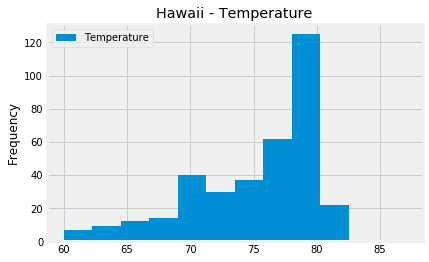

In [27]:
# ...and plot the results as a histogram

#put the data into a df
tobs_dict = {"Temperature" : tobs_list}
tobs_df = pd.DataFrame(tobs_dict)
tobs_df.head()

# tobs_df.dtypes
#currently an object(string) and need to convert to an int or float... how? .astype(int) doesn't seem to work.


tobs_df.plot.hist(by="Temperature", bins=12,title="Hawaii - Temperature" )
plt.show()

![precipitation](Images/station-histogram.png)

In [28]:
#### READ ME states: Temperature Analysis (Optional)

# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [31]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip --- use "2017-01-01" if your trip start date was "2018-01-01").
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [35]:
# Plot the daily normals as an area plot with `stacked=False`
